# Models

In [1]:
#usual data manipluation/plot tools
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#ML tools and other
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
import graphviz
from PIL import Image
import os
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [2]:
#create dataype dictionary for data, then import our cleaned data.
datatypes = {'Primary': 'category', 'UMSCUMCC': 'category', 'Age_at_dx': 'float', 'Sex': 'category',
       'Marital_status': 'category', 'Meno_stat': 'category', 'famhist': 'category', 'Nationality': 'category', 'Race': 'category',
       'diagnosis': 'category', 'Classification': 'category', 'Laterality': 'category', 'STAGEAJCC6': 'category',
       'Differentiation': 'category', 'ER_status': 'category', 'PR_status': 'category', 'CERB2_status': 'category', 'Pri_Rx': 'category',
       'Surgery_type': 'category', 'Axill_dissect': 'category', 'Radiotherapy': 'category', 'Chemotherapy': 'category',
       'Event': 'category'}

data = pd.read_csv('../clean_cancer_data.csv', sep='\t',dtype=datatypes).copy()
data.rename(index=str, columns={'Unnamed: 0':'Patient_num'},inplace=True)


In [3]:
#all looks good
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2993
Data columns (total 24 columns):
Patient_num        2994 non-null int64
Primary            2994 non-null category
UMSCUMCC           2994 non-null category
Age_at_dx          2994 non-null float64
Sex                2994 non-null category
Marital_status     2994 non-null category
Meno_stat          2994 non-null category
famhist            2994 non-null category
Nationality        2994 non-null category
Race               2994 non-null category
diagnosis          2994 non-null category
Classification     2994 non-null category
Laterality         2994 non-null category
STAGEAJCC6         2994 non-null category
Differentiation    2994 non-null category
ER_status          2994 non-null category
PR_status          2994 non-null category
CERB2_status       2994 non-null category
Pri_Rx             2994 non-null category
Surgery_type       2994 non-null category
Axill_dissect      2994 non-null category
Radiotherapy       2

## Preprocessing
Not a lot do do here, we just need to split the data into a training and testing set (train/test: 80/20)

In [4]:
from sklearn import preprocessing
proc_data = data[['Primary','UMSCUMCC','Age_at_dx','Sex','Marital_status','Meno_stat','famhist','Nationality','Race','diagnosis','Classification','Laterality','STAGEAJCC6','Differentiation','ER_status','PR_status','CERB2_status','Pri_Rx','Surgery_type','Axill_dissect','Radiotherapy','Chemotherapy']].copy()
cancer_target = data[['Event']].copy()
print(data.Event.value_counts())


1    2323
0     671
Name: Event, dtype: int64


#### Non-Stratified (random) training

In [5]:

X_train, X_test, y_train, y_test = train_test_split(proc_data, np.ravel(cancer_target), test_size=0.20, random_state=101)

#### Stratified Training

In [6]:
X_train, X_test, y_train, y_test = train_test_split(proc_data, np.ravel(cancer_target),stratify=np.ravel(cancer_target), test_size=0.20, random_state=101)

## SVM

In [7]:
#create and train model
model = svm.SVC(gamma='auto')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
#check precision using the test data (x_test and y_test)
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.05      0.09       134
           1       0.78      0.98      0.87       465

   micro avg       0.77      0.77      0.77       599
   macro avg       0.62      0.52      0.48       599
weighted avg       0.71      0.77      0.70       599



In [9]:
#Gridsearch - get the best parameters
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train, y_train)

print('\n')
print('The best parameters are ', grid.best_params_)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7759699624530664, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7756892230576441, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7756892230576441, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7759699624530664, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7756892230576441, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7756892230576441, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7759699624530664, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7756892230576441, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7756892230576441, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7756892230576441, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7822277847309136, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7719298245614035, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7769423558897243, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7434292866082604, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7368421052631579, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7756892230576441, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.0s finished




The best parameters are  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [10]:
grid_predictions = grid.predict(X_test)
print(metrics.classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.62      0.13      0.22       134
           1       0.80      0.98      0.88       465

   micro avg       0.79      0.79      0.79       599
   macro avg       0.71      0.56      0.55       599
weighted avg       0.76      0.79      0.73       599



In [11]:
#train using the best parameters, then confirm
best_svm = svm.SVC(C= 1000, gamma= 0.001, kernel= 'rbf')
best_svm.fit(X_train,y_train)
predictions = best_svm.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("accuracy score: ",accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.13      0.22       134
           1       0.80      0.98      0.88       465

   micro avg       0.79      0.79      0.79       599
   macro avg       0.71      0.56      0.55       599
weighted avg       0.76      0.79      0.73       599

accuracy score:  0.7879799666110183


# Decision Tree

In [12]:


#Create an instance of the classifier
dtree = tree.DecisionTreeClassifier()

#Fit the model on training set
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
#Use predict method on test set.
predictions = dtree.predict(X_test)

#Print the result for classification report
print(metrics.classification_report(y_test, predictions))
print("accuracy score: ",accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.43      0.45      0.44       134
           1       0.84      0.83      0.84       465

   micro avg       0.75      0.75      0.75       599
   macro avg       0.64      0.64      0.64       599
weighted avg       0.75      0.75      0.75       599

accuracy score:  0.7462437395659433


# Random Forest

In [14]:
#Import RandomForestClassifier


#Create an instance of the classifier
rfc = RandomForestClassifier(n_estimators=1000,random_state=0)

#Fit the model on training set
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
#Use predict method on test set.
predictions = rfc.predict(X_test)

#Import classification report and confusion matrix


#Print the result for classification report
print(classification_report(y_test, predictions))
print("accuracy score: ",accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.35      0.45       134
           1       0.83      0.94      0.88       465

   micro avg       0.81      0.81      0.81       599
   macro avg       0.73      0.65      0.67       599
weighted avg       0.79      0.81      0.79       599

accuracy score:  0.8096828046744574


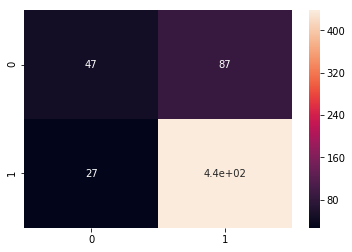

In [16]:
#confusion matrix, because why not
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))
sns.heatmap(cm,annot=True)

In [17]:
# check parameters:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [19]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,12,14,16,18,20,30,40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=0, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)




Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.5min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 152, 294, 436, 578, 720, 862, 1005, 1147, 1289, 1431, 1573, 1715, 1857, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 12, 14, 16, 18, 20, 30, 40], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='

In [21]:
random_predictions = rf_random.predict(X_test)

#Import classification report and confusion matrix


#Print the result for classification report
print(classification_report(y_test, random_predictions))
print("accuracy score: ",accuracy_score(y_test,random_predictions))

              precision    recall  f1-score   support

           0       0.63      0.30      0.41       134
           1       0.82      0.95      0.88       465

   micro avg       0.80      0.80      0.80       599
   macro avg       0.73      0.62      0.64       599
weighted avg       0.78      0.80      0.78       599

accuracy score:  0.8046744574290484


In [22]:
print("best Parameters:\n")
pprint(rf_random.best_params_)

best Parameters:

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 1005}


#### The randomised search never really betters our default random forest, so lets look at grid search

In [23]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 5, 10,12,14,16,18,20,30,40],
    'n_estimators': [100, 200, 300, 1000,2000]
}

# Create a based model
rf = RandomForestClassifier(random_state=0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print("best Parameters:\n")
pprint(grid_search.best_params_)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  7.2min finished


best Parameters:

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}


In [25]:
grid_predictions = grid_search.predict(X_test)

#Import classification report and confusion matrix


#Print the result for classification report
print(classification_report(y_test, grid_predictions))
print("accuracy score: ",accuracy_score(y_test,grid_predictions))


              precision    recall  f1-score   support

           0       0.64      0.17      0.27       134
           1       0.80      0.97      0.88       465

   micro avg       0.79      0.79      0.79       599
   macro avg       0.72      0.57      0.57       599
weighted avg       0.77      0.79      0.74       599

accuracy score:  0.7929883138564274
best Parameters:

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}


In [21]:
#### Must be missing something! Both grid and random search get worse accuracy.

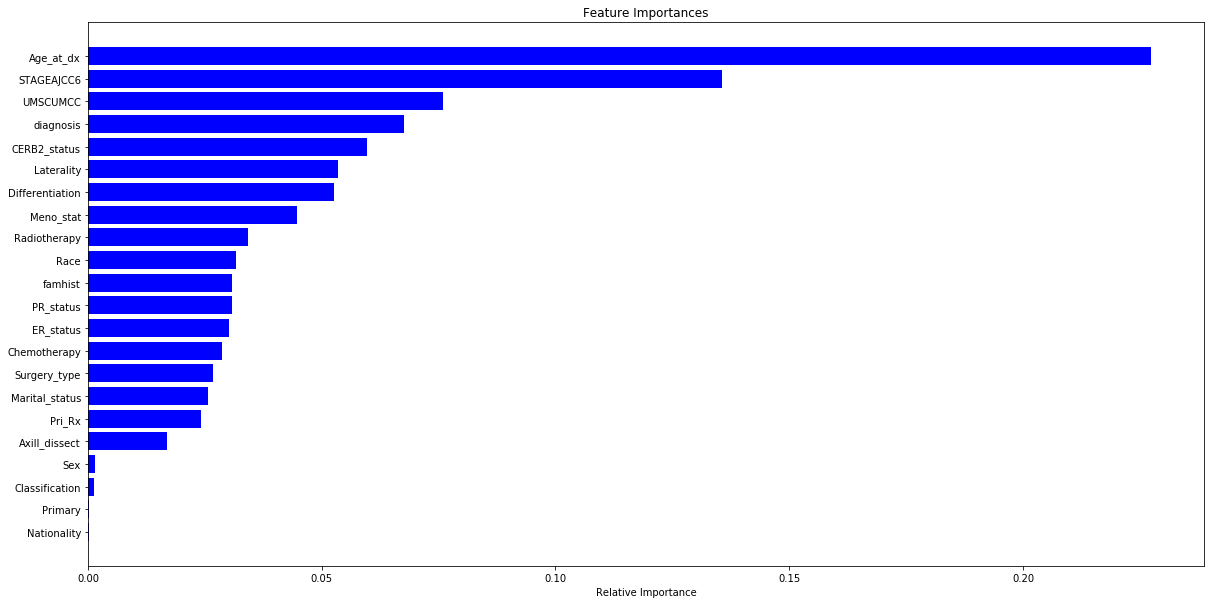

In [22]:
# importance of features

features = proc_data.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
fig= plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
fig = plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance')
plt.show()


In [23]:
#select most important features and print out (threshold of 5%)
sfm = SelectFromModel(rfc, threshold=0.05)
sfm.fit(X_train, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(proc_data.columns[feature_list_index])

UMSCUMCC
Age_at_dx
diagnosis
Laterality
STAGEAJCC6
Differentiation
CERB2_status


In [24]:
#create random forest just using these important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rfc_important = RandomForestClassifier(n_estimators=1000, random_state=0)

# Train the new classifier on the new dataset containing the most important features
rfc_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
y_important_pred = rfc_important.predict(X_important_test)
accuracy_score(y_test, y_important_pred)
print(classification_report(y_test, y_important_pred))
print("accuracy score: ",accuracy_score(y_test, y_important_pred))

              precision    recall  f1-score   support

           0       0.49      0.42      0.45       134
           1       0.84      0.87      0.86       465

   micro avg       0.77      0.77      0.77       599
   macro avg       0.66      0.65      0.65       599
weighted avg       0.76      0.77      0.76       599

accuracy score:  0.7712854757929883


# Cross Validation - SVM and Decision Tree


In [ ]:
#SVM
scores = cross_val_score(best_svm, proc_data, np.ravel(cancer_target), cv=20)
print ("Mean accuracy using cv 20 times: %0.2f (+/- %0.2f), best: %0.2f" % (scores.mean(), scores.std() / 2,scores.max()))
# this supports what we did before, now lets do kfold:
#Kfold = 5
cv = KFold(n_splits=5, random_state=101, shuffle=False) 
scores = cross_val_score(best_svm, proc_data, np.ravel(cancer_target), cv=cv)
print("Using a kfold of 5, best result: %0.2f, fold number: %d" %(scores.max(), np.where(scores == scores.max())[0]+1))
print(scores)


In [ ]:
#Decision Tree
scores = cross_val_score(dtree, proc_data, np.ravel(cancer_target), cv=20)
print ("Mean accuracy using cv 20 times: %0.2f (+/- %0.2f), best: %0.2f" % (scores.mean(), scores.std() / 2,scores.max()))


scores = cross_val_score(dtree, proc_data, np.ravel(cancer_target), cv=cv)



In [ ]:
#save dec tree as image

tree.export_graphviz(dtree,feature_names=proc_data.columns,
                filled=True,
                rounded=True,out_file='tree.dot')
os.system('dot -Tpng tree.dot -o tree.png')


In [ ]:
im = Image.open('tree.png')
old_area = im.size
area = (0, 0, 29089, 400)
cropped_img = im.crop(area)
cropped_img

In [ ]:
print(im.height)